# Clustering text

Clustering text in life sciences has numerous valuable applications. It can group medical case reports or clinical trial summaries to uncover patterns related to disease progression, treatment efficacy, or adverse events. By clustering information from text-based chemical or pharmacological databases, researchers can identify compounds with similar mechanisms of action. Patient data can be clustered to highlight subpopulations requiring different approaches in clinical care or personalized treatment plans. More broadly, clustering scientific articles or abstracts from databases like PubMed helps identify emerging research topics, classify studies into relevant categories, and detect trends in the literature.

---

#### Objective 

The goal of this assignment is for students to learn how to apply natural language processing (NLP) techniques and unsupervised machine learning to analyze and extract meaningful insights from clinical case reports.

---

#### About the notebook
This notebook uses a collection of clinical case reports to cluster words by topics using the NMF method. To cluster text we need to preprocess the text first with regular natural language processing cleaning steps such as remove punctuations, stopwords, or other unwanted text. we lower the text and use the lemma to reduce variation of words. This is all done in part A. 

Next we need to prepare the text in a document term matrix so that NMF can perform the calculations. The Document-Term Matrix (DTM) represents the frequency of words (or terms) in a collection of documents. Each row in the matrix represents a document, and each column represents a word in the vocabulary. The value in each cell represents the frequency of the corresponding word in the corresponding document. This is done in part B

Lastly we run the clustering algorithm and visualize the outcome. This is done in part C

---

#### The data 
A collection of 200 clinical case report documents in plain text format are used. The documents are named using PubMed document IDs, and have been edited to include only clinical case report details. The dataset is called "MACCROBAT2020" and is the second release of this dataset, with improvements made to the consistency and format of annotations
https://figshare.com/articles/dataset/MACCROBAT2018/9764942

---

#### Assignment steps

1. Read, execute and analyse the code in the notebook.  
2. Read the article Clinical Documents Clustering Based on Medication/Symptom Names Using Multi-View Nonnegative Matrix Factorization. you can find the article <a href = 'https://pubmed.ncbi.nlm.nih.gov/26011887/'> here</a>. Explain the similarities of this notebook and the article. Explain in your own words what need to be added to this notebook to reproduce the article. There is no need to code the solution.
3. Improve the outcome improving the data preprocessing and the hyper parameter configurations. Explain your choices. Your solution should be a coded solution with comments. Are there any other weighting solutions next to TF-IDF?

You are welcome to use data from your own project as long as it is text that you cluster. If you choose to do so, ensure that you reflect on your solution by comparing it to a similar approach or research topic discussed in a related article. Additionally, explain how your text clustering method aligns with or differs from the findings in that article.

>**Bonus**
Use an embedding algorithm to featurize the text and cluster the feature matrix. Compare the result with the NMF as a baseline.

---


#### Learning Outcomes
By completing this assignment, you will:

- Understand and implement standard text preprocessing steps, such as cleaning, lemmatization, and removing unwanted text elements.
- Construct a Document-Term Matrix (DTM) to represent text data numerically, preparing it for computational analysis.
- Apply the Non-Negative Matrix Factorization (NMF) method to cluster clinical reports by topics.
- Visualize and interpret the clusters to identify patterns in the text, such as common themes or key topics, and gain insights into clinical case data.
- Learn to evaluate outcomes using appropriate performance metrics and critical reflection.

---

#### Assessment criteria
- Organized solution: Portfolio well-organized. Code is devided in functions or class methods, using coding standards and is adequately documented. Code wich is not written in functions or methods will not be reviewed. Assignment can be easily reproduced by others. 
- Problem Understanding and Formulation: Demonstrates a clear understanding of the problem to be addressing
- Literature: cites recent and authoritative sources 
- Data Preprocessing and Exploration: Thoroughly preprocessed the data and other data quality issues. Explores the dataset to gain insights and understand its characteristics
- Model Selection and Architecture: Chooses appropriate unsupervised machine learning algorithms for the given problem. Provides a rationale for the choices based on the characteristics of the data and problem
- Result and discussion: Interprets and discusses the results in a meaningful way. Compares the results to baselines. Conclusions are drawn from the results supported by evidence.
- Critical Thinking and Problem-Solving: Student demonstrates critical thinking skills by addressing challenges and proposing insightful solutions
- Presentation and Communication:  The concepts are explained clearly, and technical terms are appropriately defined




#### References: 
https://towardsdatascience.com/nmf-a-visual-explainer-and-python-implementation-7ecdd73491f8

Ling Y, Pan X, Li G, Hu X. Clinical Documents Clustering Based on Medication/Symptom Names Using Multi-View Nonnegative Matrix Factorization. IEEE Trans Nanobioscience. 2015 Jul;14(5):500-4. doi: 10.1109/TNB.2015.2422612. Epub 2015 May 21. PMID: 26011887.

Caufield, J. Harry (2019). MACCROBAT. figshare. Dataset. https://doi.org/10.6084/m9.figshare.9764942.v2


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
import re
import string
import glob
import pandas as pd
from pathlib import Path

# Part A: get and clean the text

## Get the data

In [2]:
#create empty dataframe
df = pd.DataFrame(columns=['docid','text'])

# get all files ending with .txt
docs = [x for x in glob.glob("*.txt")]

#fill dataframe
for doc in docs:
    txt = Path(doc).read_text()
    df.loc[len(df.index)] = [doc[:-4], txt]

#set index docid       
df = df.set_index('docid')

In [3]:
df.head()

,text
docid,
19860925,Our 24-year-old non-smoking male patient prese...
26228535,A 25-year-old female patient had noticed left-...
27773410,A 69-year-old male diabetic patient was admitt...
28103924,Our patient was a 7-year-old Italian boy born ...
27064109,A 53-year-old man came to our hospital with si...


## Cleaning the text

The code below defines a function called clean_text that takes a text parameter and returns a cleaned version of it. The function first converts the text to lowercase using the `lower()` method. It then removes any text enclosed in square brackets using **regular expressions** and the re.sub() method. Next, it removes any **punctuation** from the text using the `string.punctuation` module and `re.escape()` and `re.sub()` methods. It then removes any words that **contain numbers** using `re.sub()` and a regular expression. Finally, it removes any **read errors** (represented by the � character) using `re.sub()`.

The code then defines a lambda function called cleaned that takes a single parameter `x` and applies the `clean_text` function to it. This lambda function can be used to clean text data in a Pandas dataframe or any other data structure that can take a lambda function

In [4]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation, remove read errors,
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('�', ' ', text)
    return text

cleaned = lambda x: clean_text(x)

The function 'nouns' cleans a text and extracts only the nouns from it. It first defines a lambda function called 'is_noun' that checks if a given word is a noun, based on its part of speech (POS) tag. The input text is then tokenized using the `word_tokenize` function from the **nltk** module, which breaks down the text into smaller units called tokens. Tokenization is an important pre-processing step in NLP that helps standardize and prepare text data for further analysis.

The function creates a `WordNetLemmatizer` object from the nltk module to lemmatize each word, which is the process of converting a word to its base or dictionary form. Lemmatization helps to reduce the dimensionality of text data and improve the accuracy of the analysis, especially in cases where words have different inflected forms but share the same root.

The function uses a list comprehension to lemmatize each word in the tokenized text if it is a noun, and stores the resulting list of lemmatized nouns in the 'all_nouns' variable. Finally, the function returns a string containing the joined list of lemmatized nouns.

Note that this function requires the 'nltk' module to be imported and assumes that the 'pos_tag' function from the 'nltk' module is available.

In [5]:
# Noun extract and lemmatize function
def nouns(text):
    '''Given a string of text, tokenize the text 
    and pull out only the nouns.'''
    # create mask to isolate words that are nouns
    is_noun = lambda pos: pos[:2] == 'NN'
    # store function to split string of words 
    # into a list of words (tokens)
    tokenized = word_tokenize(text)
    # store function to lemmatize each word
    wordnet_lemmatizer = WordNetLemmatizer()
    # use list comprehension to lemmatize all words 
    # and create a list of all nouns
    all_nouns = [wordnet_lemmatizer.lemmatize(word) \
    for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    
    #return string of joined list of nouns
    return ' '.join(all_nouns)


In [6]:
# Clean Text
df["text"] = df["text"].apply(cleaned)
data_nouns = pd.DataFrame(df["text"].apply(nouns))
# Visually Inspect
data_nouns.head()

,text
docid,
19860925,year non patient hemoptysis day thoracic pain ...
26228535,year female patient loss year hemiparesis mont...
27773410,year patient failure therapy edema basal crepi...
28103924,patient year boy gestation duration age month ...
27064109,year man hospital sign symptom heart failure w...


# Part B: The Document-Term Matrix (DTM)

To perform analyses we need to create a Document-Term Maxtrix. 
The Document-Term Matrix (DTM) represents the frequency of words (or terms) in a collection of documents. Each row in the matrix represents a document, and each column represents a word in the vocabulary. The value in each cell represents the frequency of the corresponding word in the corresponding document.

In specific case below, the DTM has been created using only the nouns extracted from the original text, and has been transformed using the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme. The TF-IDF scheme assigns weights to words based on how often they appear in a document relative to how often they appear in the entire corpus. Words that appear frequently in a document but infrequently in the corpus are given higher weights, as they are considered to be more important for distinguishing that document from others in the corpus. This weighting scheme is commonly used in text mining and information retrieval to identify key terms or topics in a collection of documents.

The resulting DTM can be used for various purposes such as topic modeling, clustering, classification, and visualization of text data.

In [7]:
# Create a document-term matrix with only nouns
# Store TF-IDF Vectorizer
tv_noun = TfidfVectorizer(stop_words=[text.ENGLISH_STOP_WORDS], ngram_range = (1,1), max_df = .8, min_df = .01)
# Fit and Transform speech noun text to a TF-IDF Doc-Term Matrix
data_tv_noun = tv_noun.fit_transform(data_nouns.text)
# Create data-frame of Doc-Term Matrix with nouns as column names
data_dtm_noun = pd.DataFrame(data_tv_noun.toarray(), columns=tv_noun.get_feature_names_out())
data_dtm_noun.index = df.index
# Visually inspect Document Term Matrix
data_dtm_noun.head()

,abdomen,ablation,abnormality,above,abscess,absence,absent,abuse,access,accompanying,...,york,yr,zhejiang,zinc,zone,µg,µmol,μg,μl,μmol
docid,,,,,,,,,,,,,,,,,,,,,
19860925,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
26228535,0.000000,0.0,0.0,0.0,0.000000,0.056135,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
27773410,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
28103924,0.054317,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
27064109,0.000000,0.0,0.0,0.0,0.080138,0.000000,0.0,0.0,0.0,0.0,...,0.083947,0.0,0.0,0.0,0.0,0.0,0.0,0.062559,0.0,0.0


# Part C: Run the NMF

This code below performs Non-negative Matrix Factorization (NMF) on the Document Term Matrix (DTM) with only nouns. NMF is a dimensionality reduction technique that decomposes a matrix into two matrices: a document-topic matrix (W) and a topic-term matrix (H).

The code first creates an NMF model with 5 topics. The model is then fit to the DTM with the fit_transform() method, which returns the document-topic matrix (W).

The `display_topics()` function is called to extract the top words from the topic-term matrix (H) using the feature names from the TF-IDF vectorizer. 

The resulting output will show the top n words for each of the n topics learned by the NMF model.

In [8]:
def display_topics(model, feature_names, num_top_words, topic_names=None):
    '''Given an NMF model, feature_names, and number of top words, print 
       topic number and its top feature names, up to specified number of top words.'''
    # iterate through topics in topic-term matrix, 'H' aka
    # model.components_
    for ix, topic in enumerate(model.components_):
        #print topic, topic number, and top words
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] \
             for i in topic.argsort()[:-num_top_words - 1:-1]]))
  

#### the original code : applied tfidf , then nmf(5), with default parameters.

In [9]:
nmf_model = NMF(5)
# Learn an NMF model for given Document Term Matrix 'V' 
# Extract the document-topic matrix 'W'
doc_topic = nmf_model.fit_transform(data_dtm_noun)
# Extract top words from the topic-term matrix 'H' 
display_topics(nmf_model, tv_noun.get_feature_names_out(), 10)


Topic  0
dl, mg, level, blood, ml, day, count, platelet, serum, range

Topic  1
tumor, mass, cell, cm, figure, lesion, fig, lymph, resection, metastasis

Topic  2
valve, figure, echocardiography, heart, artery, mm, pressure, failure, atrium, vein

Topic  3
lung, day, chest, fig, treatment, hospital, tuberculosis, therapy, dyspnea, effusion

Topic  4
age, month, eye, week, seizure, rash, parent, mri, muscle, arm


## Question2: Explain the similarities of this notebook and the article, And how to reproduce the article?
#### Similarities: both are applied tf_idf vectorizer with NMF to get the topic words from clinical notes.The article used more than one vectorizer and more than one model to get the a better result.
#### Differeneces: First , pre_process: The article applied the  Stanford CoreNLP Tool and removing Negation words, and extracting medication and symptom names by the MetaMap program and The MedEx system. But the notebook just applied the NLTK library to clean the text and get all nouns. Second, the article applied the Count and TF-IDF vectorizer to the Medication,Symptom words. It is specific. However the notebook only applied the TF-IDF vectorizer to all nouns (except stop_words). Third, the article applied the NMF model and Multi_view NMF model to cluster the desease types, the notebook applied the NMF model to cluster the topic words. Fourth, the article applied NMI to evaluate the models and decide the number of clusters.

For inspiration of visualizations see https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

## In my cluster-words.py file, I have the following codes:
#### There are two vectorizer functions, one is tfidf, the another one is countvectorizer.Then I made three model, nmf ,lda, minibatchnmf.Finally , Evaluate the models by Silhoutte score and preplexity and a Visualization function.
#### Then in the next, I am trying to tune parameters to get a best model with the porper parameters. So I applied the GridSearchCV to tune the parameters( so I have to make two classes for vertorizers and models).  It seems that the best model just about 0.47 accurancy.

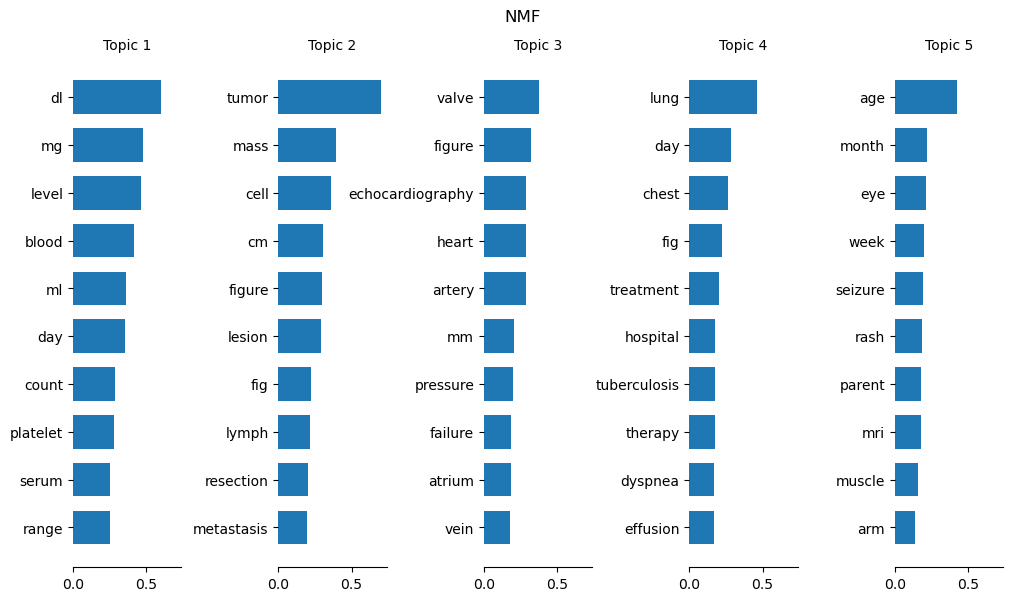

In [10]:
from cluster_words import visualize_top_words
n_components = 5
n_top_words = 10
visualize_top_words(nmf_model, tv_noun.get_feature_names_out(), n_top_words, n_components, title="NMF")

#### here I try CouterVectorizer to replace tf_idf. 

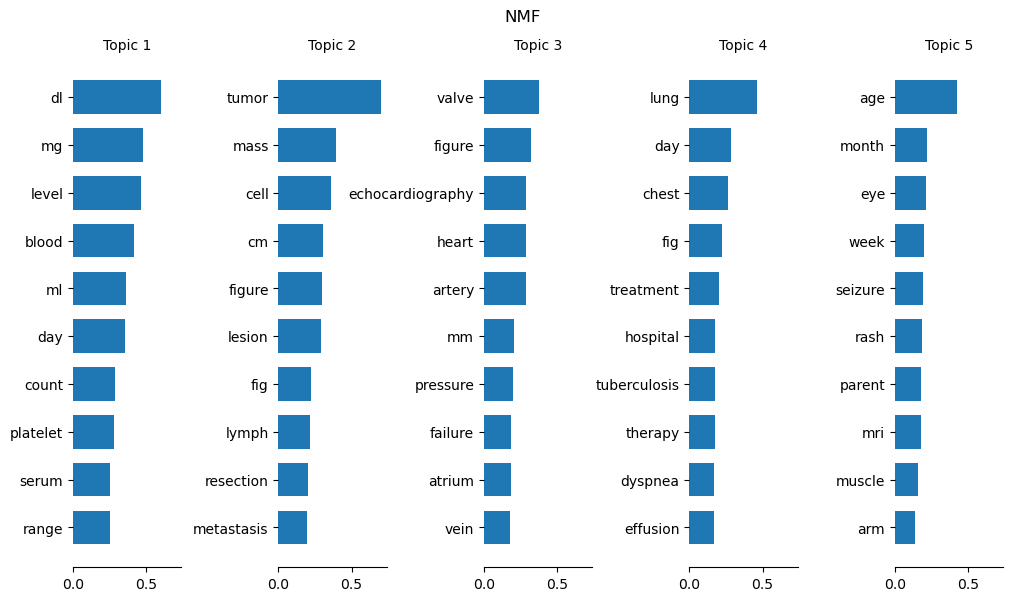

In [11]:
from cluster_words import vectorizer_count
stopwords = [text.ENGLISH_STOP_WORDS]
data_dtm_noun_count,vectorizer = vectorizer_count(data_nouns.text, stopwords, ngram_range=(1, 1), max_df=0.8, min_df=0.01)
data_dtm_noun_count.head()
visualize_top_words(nmf_model, vectorizer.get_feature_names_out(), n_top_words, n_components, title="NMF")

#### Compared with the two plots, there is no big difference between TF_IDF vectorizer with Countvectorizer. And The topic 10 words have some general terms , time-related terms, some units etc, So I am going to drop them by adding them to stop_wrods.

In [12]:
from nltk.corpus import stopwords
from cluster_words import vectorizer_tfidf

# Add some specific stop words for the medical domain
domain_stop_words = [
    # General terms
    'patient', 'case', 'study', 'clinical', 'disease', 'result', 'method', 'analysis', 'significant', 'diagnosis', 
    # Time-related terms
    'day', 'history', 'month', 'week', 'year', 'hour', 'age', 'old', 'time',
    # Measurement units
    'fig', 'figure', 'dl', 'mg', 'ml', 'iu', 'ct', 'mm','mol','mmol', 'l', 'cm', 'mmhg', 'umol', 'pg', 'gh', 'μmol',
    # Medical terms
    'test', 'treatment', 'therapy', 'hospital', 'admission', 'cell','size', 'mass', 'level', 'left', 'min', 'rate', 'count'
]
stop_words = list(set(stopwords.words('english')).union(set(domain_stop_words)))

data_dtm_noun_tfidf, vectorizer = vectorizer_tfidf(data_nouns.text, stop_words, ngram_range=(1, 1), max_df=0.8, min_df=0.01)
data_dtm_noun_tfidf.head()

,abdomen,ablation,abnormality,abscess,absence,absent,abuse,access,accompanying,accordance,...,yellow,york,yr,zhejiang,zinc,zone,µg,µmol,μg,μl
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.000000,0.0,0.0,0.000000,0.063014,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,0.059513,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.000000,0.0,0.0,0.084533,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.088552,0.0,0.0,0.0,0.0,0.0,0.0,0.06599,0.0


#### Then I am going to try different models to decompose the matrix.

In [13]:
from cluster_words import modeling_nmf,modeling_lda,modeling_minibatch_nmf
nmf_modeling = modeling_nmf(data_dtm_noun_tfidf, vectorizer, n_components=5, max_iter=1000, alpha_W=0.00005, alpha_H=0.00005)
print('#'*100)
lda_modeling = modeling_lda(data_dtm_noun_tfidf, vectorizer, n_components=5, max_iter=1000)
print('#'*100)
minibatch_modeling = modeling_minibatch_nmf(data_dtm_noun_tfidf, vectorizer, n_components=5, max_iter=1000, alpha_W=0.00005, alpha_H=0.00005)

Topic 1: heart, pressure, blood, ejection, fraction, failure, function, ecg, echocardiography, tachycardia
Topic 2: tumor, lesion, lymph, metastasis, node, resection, nodule, carcinoma, chemotherapy, examination
Topic 3: valve, artery, leaflet, echocardiography, atrium, regurgitation, vein, bypass, suture, prosthesis
Topic 4: lung, chest, respiratory, blood, tuberculosis, sputum, culture, hemoptysis, effusion, cough
Topic 5: blood, eye, examination, mri, rash, liver, muscle, pain, seizure, lesion
####################################################################################################
Topic 1: hypersensitivity, laparoscope, return, sigmoidoscopy, infancy, frameshift, twenty, frontal, forearm, extraction
Topic 2: hypersensitivity, laparoscope, return, sigmoidoscopy, infancy, frameshift, twenty, frontal, forearm, extraction
Topic 3: tumor, lesion, examination, biopsy, lymph, metastasis, node, liver, resection, pain
Topic 4: blood, heart, pressure, artery, lung, examination, ec

#### Evaluate the model

In [14]:
from cluster_words import evaluate_model,evaluate_model_lda
evaluate_model(data_dtm_noun_tfidf,nmf_modeling)
evaluate_model(data_dtm_noun_tfidf,minibatch_modeling)
evaluate_model_lda(data_dtm_noun_tfidf,lda_modeling)

Silhouette Score: 0.4710937785332727
Silhouette Score: 0.45391464029816125
Perplexity Score: 9137.452075338208


### It seems that there are some topics that is clear, some are not. So I am going to do parameter tuning for vectorizer and models

In [15]:
ngram_range = (1,2)
data_dtm_noun_tfidf_2, vectorizer = vectorizer_tfidf(data_nouns.text, stop_words, ngram_range=ngram_range, max_df=0.8, min_df=0.01)
data_dtm_noun_tfidf_2.head()

,abdomen,abdomen examination,abdomen palpation,abdomen pelvis,abdomen tender,ablation,ablation catheter,abnormality,abscess,absence,...,zone,µg,µmol,μg,μg episode,μg kg,μg serum,μl,μl hemoglobin,μl lymphocyte
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058402,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.055528,0.105172,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.076167,0.000000,...,0.0,0.0,0.0,0.059459,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
for n_components in [5,10,15]:
    modeling_nmf(data_dtm_noun_tfidf_2, vectorizer, n_components=n_components, max_iter=1000, alpha_W=0.00005, alpha_H=0.00005)
    print('#'*100)

Topic 1: heart, pressure, blood, blood pressure, ejection fraction, ejection, failure, fraction, function, ecg
Topic 2: tumor, lesion, lymph, metastasis, node, lymph node, resection, carcinoma, nodule, chemotherapy
Topic 3: valve, artery, leaflet, echocardiography, atrium, regurgitation, vein, bypass, suture, tee
Topic 4: eye, blood, examination, mri, rash, liver, muscle, pain, lesion, seizure
Topic 5: lung, chest, respiratory, blood, tuberculosis, culture, sputum, hemoptysis, effusion, cough
####################################################################################################
Topic 1: heart, pressure, blood pressure, ejection fraction, ejection, blood, fraction, failure, function, echocardiography
Topic 2: tumor, metastasis, lesion, resection, lymph, examination, node, colon, nodule, lymph node
Topic 3: valve, leaflet, atrium, echocardiography, regurgitation, bypass, suture, tee, prosthesis, artery
Topic 4: range, blood, mri, serum, brain, parent, platelet, muscle, seiz

In [17]:
n_components = 15
nmf_modeling_2 = modeling_nmf(data_dtm_noun_tfidf_2, vectorizer, n_components=n_components, max_iter=1000, alpha_W=0.00005, alpha_H=0.00005)
print('#'*100)
lda_modeling_2 = modeling_lda(data_dtm_noun_tfidf_2, vectorizer, n_components=n_components, max_iter=1000)
print('#'*100)
minibatch_modeling_2 = modeling_minibatch_nmf(data_dtm_noun_tfidf_2, vectorizer, n_components=n_components, max_iter=1000, alpha_W=0.00005, alpha_H=0.00005)
evaluate_model(data_dtm_noun_tfidf_2,nmf_modeling_2)
evaluate_model(data_dtm_noun_tfidf_2,minibatch_modeling_2)
evaluate_model_lda(data_dtm_noun_tfidf_2,lda_modeling_2)

Topic 1: heart, pressure, ejection fraction, ejection, fraction, blood pressure, failure, blood, function, echocardiography
Topic 2: tumor, metastasis, resection, nodule, examination, gist, nucleus, diameter, stomach, lesion
Topic 3: valve, leaflet, echocardiography, atrium, regurgitation, bypass, suture, tee, prosthesis, artery
Topic 4: muscle, parent, carnitine, activity, gait, brain, gene, csf, reference, ataxia
Topic 5: lung, chest, tuberculosis, respiratory, culture, sputum, dyspnea, cough, hemoptysis, effusion
Topic 6: lymph, lymph node, lesion, node, chemotherapy, cycle, metastasis, adenocarcinoma, tomography, tumor
Topic 7: duct, liver, bile duct, bile, jaundice, worm, gall, cholangiopancreatography, bladder, gall bladder
Topic 8: eye, acuity, vision, nerve, injection, disc, field, pupil, vision eye, eye eye
Topic 9: rash, zinc, face, supplementation, deficiency, zinc supplementation, zinc deficiency, scalp, plaque, injection
Topic 10: artery, stent, balloon, graft, hematoma, s

/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:2341: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Topic 1: heart, pressure, ejection fraction, ejection, blood pressure, fraction, failure, blood, function, echocardiography
Topic 2: tumor, metastasis, lesion, resection, examination, colon, lymph, nodule, tomography, diameter
Topic 3: valve, leaflet, echocardiography, atrium, regurgitation, suture, bypass, tee, prosthesis, artery
Topic 4: parent, muscle, carnitine, activity, gene, gait, brain, reference, child, lactate
Topic 5: lung, chest, tuberculosis, respiratory, culture, sputum, effusion, hemoptysis, dyspnea, blood
Topic 6: breast, chemotherapy, lymph, cycle, lesion, node, lymph node, metastasis, tumour, carcinoma
Topic 7: duct, liver, bile duct, bile, jaundice, pain, gall, worm, lesion, quadrant
Topic 8: eye, acuity, vision, nerve, injection, disc, field, pupil, vision eye, eye eye
Topic 9: rash, zinc, face, supplementation, deficiency, zinc supplementation, zinc deficiency, scalp, presentation, setting
Topic 10: artery, stent, balloon, graft, hematoma, stenosis, lad, boston, ca

/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:2341: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Silhouette Score: 0.37137284158578354
Perplexity Score: 269593.71066736826


#### Compare the two results, the ngram_range was changed to (1,2) from(1,1) and the N_conponents was changed to 15 from 5, has decreased the models accurancy. So I am going to apply GridSearchCV to find the best parameters for the model.

#### There are others parameters likes alpha_W=0.00005, alpha_H=0.00005 in models,  max_df = .8, min_df = .01 in Vectorizers, But here I do not run it , besause of the computer source. But it can be seleceted.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from class_Vectorizer import CustomVectorizer
from class_TopicModeling import TopicModeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer
import numpy as np

data = data_nouns.text

pipeline = Pipeline([
    ('vectorizer', CustomVectorizer(stop_words=stop_words,vectorizer_type='tfidf')),
    ('nmf', TopicModeling(model_type='nmf'))
])

# Parameter grid
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    #'vectorizer__max_df': [0.8, 0.9],
    #'vectorizer__min_df': [0.01, 0.05],
    'nmf__n_components': [5, 10, 15],
    #'nmf__max_iter': [500, 1000],
    #'nmf__alpha_W': [0.00005, 0.0001],
    #'nmf__alpha_H': [0.00005, 0.0001]
}

# Define a custom scoring function (e.g., Silhouette Score for topic clustering)
def custom_silhouette_score(estimator, X):
    """
    Compute Silhouette Score for the fitted NMF model.
    """
    W = estimator.named_steps['nmf'].W  # Access topic distribution (W matrix)
    if W is None:
        raise ValueError("W matrix not found. Ensure the NMF model is fitted.")
    labels = np.argmax(W, axis=1)  # Assign each document to the dominant topic
    if len(np.unique(labels)) < 2:
        return -1  # Silhouette Score requires at least 2 clusters
    return silhouette_score(X, labels)

scorer = make_scorer(custom_silhouette_score, greater_is_better=True)

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(data)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_
print("Best Topics:")
best_model.named_steps['nmf'].print_topics(best_model.named_steps['vectorizer'])


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator,

[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 1); total time=   0.2s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 1); total time=   0.1s


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator,

[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 2); total time=   0.4s
[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 2); total time=   0.3s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 1); total time=   0.2s
[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 2); total time=   0.4s
[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 2); total time=   0.3s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 1); total time=   0.2s
[CV] END nmf__n_components=5, vectorizer__ngram_range=(1, 2); total time=   0.3s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 1); total time=   0.2s
[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 1); total time=   0.2s
[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 1); total time=   0.3s
[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 1); total time=   0.3s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 2); total time=   0.5s


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator,

[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 1); total time=   0.1s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 2); total time=   0.5s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 2); total time=   0.5s
[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 2); total time=   0.6s


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV] END nmf__n_components=10, vectorizer__ngram_range=(1, 2); total time=   1.0s


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 1); total time=   1.0s


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 2); total time=   0.9s


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 2); total time=   1.4s


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator,

[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 2); total time=   1.6s
[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 2); total time=   1.5s
[CV] END nmf__n_components=15, vectorizer__ngram_range=(1, 2); total time=   2.1s
Best Parameters: {'nmf__n_components': 5, 'vectorizer__ngram_range': (1, 1)}
Best Topics:
Topic 1: blood, heart, pressure, lung, chest, platelet, respiratory, hg, effusion, laboratory
Topic 2: tumor, metastasis, lesion, resection, lymph, examination, node, colon, tomography, nodule
Topic 3: valve, echocardiography, artery, atrium, regurgitation, leaflet, heart, vein, ventricle, failure
Topic 4: eye, examination, rash, mri, pain, liver, muscle, lesion, seizure, child
Topic 5: breast, lesion, chemotherapy, carcinoma, tumour, cycle, lymph, node, cancer, bone


/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/hezhipeng/anaconda3/envs/dask_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


##### Best Parameters: {'nmf__alpha_H': 5e-05, 'nmf__alpha_W': 5e-05, 'nmf__max_iter': 500, 'nmf__n_components': 5, 'vectorizer__max_df': 0.8, 'vectorizer__min_df': 0.01, 'vectorizer__ngram_range': (1, 1)}
##### Best Topics:
##### Topic 1: blood, heart, pressure, lung, chest, platelet, respiratory, hg, effusion, laboratory. The words can be summurised to  Cardiopulmonary and Hematological Indicators
##### Topic 2: tumor, metastasis, lesion, resection, lymph, examination, node, colon, tomography, nodule. The words can be summurised to  Oncology and Tumor Diagnostics.
##### Topic 3: valve, echocardiography, artery, atrium, regurgitation, leaflet, heart, vein, ventricle, failure. The words can be summurised to   Cardiac Function and Disorders.
##### Topic 4: eye, examination, rash, mri, pain, liver, muscle, lesion, seizure, child. The words can be summurised to  Neurological and Musculoskeletal Symptoms.
##### Topic 5: breast, lesion, chemotherapy, carcinoma, tumour, cycle, lymph, node, cancer, bone. The words can be summurised to  Breast Cancer and Chemotherapy.

### Visualized by WordCloud with the best parameters

Topic 1: heart, pressure, blood, ejection, fraction, failure, function, ecg, echocardiography, tachycardia
Topic 2: tumor, lesion, lymph, metastasis, node, resection, nodule, carcinoma, chemotherapy, examination
Topic 3: valve, artery, leaflet, echocardiography, atrium, regurgitation, vein, bypass, suture, prosthesis
Topic 4: lung, chest, respiratory, blood, tuberculosis, sputum, culture, hemoptysis, effusion, cough
Topic 5: blood, eye, examination, mri, rash, liver, muscle, pain, seizure, lesion


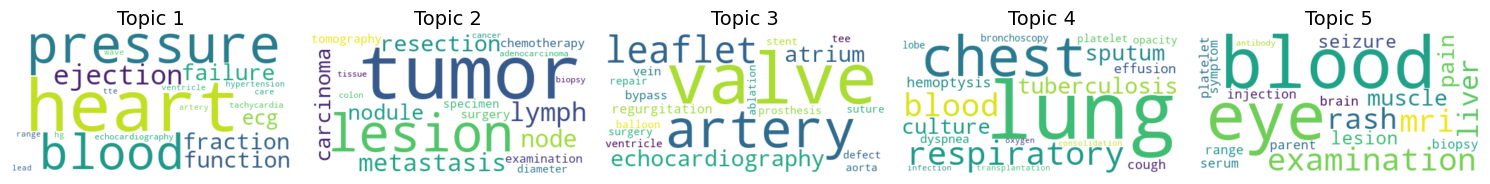

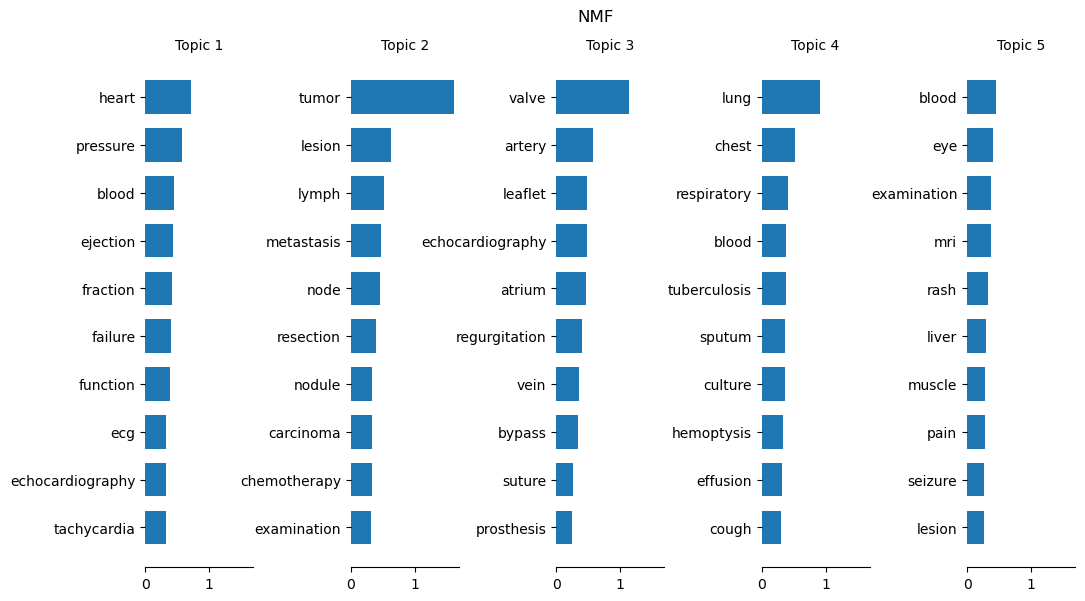

In [19]:
from cluster_words import visualize_topic_wordcloud
from cluster_words import visualize_top_words

data_dtm_noun, best_vectorizer = vectorizer_tfidf(data_nouns.text, stop_words, ngram_range=(1, 1), max_df=0.8, min_df=0.01)
best_model = modeling_nmf(data_dtm_noun, best_vectorizer, n_components=5, max_iter=1000, alpha_W=0.00005, alpha_H=0.00005)
visualize_topic_wordcloud(best_model, best_vectorizer.get_feature_names_out(), 5)
visualize_top_words(best_model, best_vectorizer.get_feature_names_out(), n_top_words, n_components, title="NMF")

#### Evaluate the model.

In [20]:
evaluate_model(data_dtm_noun,best_model)

Silhouette Score: 0.4710937785332727


## Conclusion: after the selections, the Silhouette score is 0.47. A Silhouette Score of 0.471 suggests a moderately good clustering structure. I changed the Vectorizers and different models, and their parameters by GridSearchCV. The best model is the one with the highest Silhouette score. From the article, We can see that We can do more things in the pre_processing step. Applying the MedEx system and the MetaMap might improve the results. And we can also categorise the text documnets to different views, then apply the Multi_view NMF might help cluster the desease types or sympton types.